In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [7]:
!nvidia-smi

Sat Aug  1 23:08:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0  On |                  N/A |
| 33%   47C    P8    10W / 180W |    589MiB /  8117MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

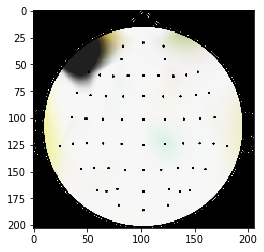

In [17]:
topo = cv2.imread("topomaps_RT_100_w_sub/test/combined/3/bts_502.png", cv2.IMREAD_COLOR)
plt.imshow(topo)

In [2]:
def resize_and_save(topo, path):
    ## (1) Convert to gray, and threshold
    gray = cv2.cvtColor(topo, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    ## (2) Morph-op to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    ## (3) Find the max-area contour
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    x,y,w,h = cv2.boundingRect(cnt)
    dst = topo[y:y+h, x:x+w]
    
    cv2.imwrite(path, dst)


In [3]:
def load_resize_save(folder_name, t="train", label=0):
    main_path = os.path.join(folder_name, t, 'combined', str(label))
    bts_sample_paths = [os.path.join(main_path, bts) for bts in os.listdir(main_path)]
    for path in tqdm(bts_sample_paths):
        topo = cv2.imread(path, cv2.IMREAD_COLOR)
        if topo.shape == (203, 206, 3):
            continue
        resize_and_save(topo, path)

In [4]:
def change_background(folder_name, t="train", label=0):
    main_path = os.path.join(folder_name, t, 'combined', str(label))
    bts_sample_paths = [os.path.join(main_path, bts) for bts in os.listdir(main_path)]
    for path in tqdm(bts_sample_paths):
        topo = cv2.imread(path, cv2.IMREAD_COLOR)
        topo = np.where(topo == 255, 0, topo)
        cv2.imwrite(path, topo)

In [5]:
load_resize_save("topomaps_RT_50_w_sub_h1", label=0)
load_resize_save("topomaps_RT_50_w_sub_h1", label=1)
load_resize_save("topomaps_RT_50_w_sub_h1", label=3)


change_background("topomaps_RT_50_w_sub_h1", label=0)
change_background("topomaps_RT_50_w_sub_h1", label=1)
change_background("topomaps_RT_50_w_sub_h1", label=3)

100%|██████████| 18336/18336 [00:30<00:00, 599.92it/s]


In [6]:
load_resize_save("topomaps_RT_50_w_sub_h1", "test", label=0)
load_resize_save("topomaps_RT_50_w_sub_h1", "test", label=1)
load_resize_save("topomaps_RT_50_w_sub_h1", "test", label=3)

change_background("topomaps_RT_50_w_sub_h1", "test", label=0)
change_background("topomaps_RT_50_w_sub_h1", "test", label=1)
change_background("topomaps_RT_50_w_sub_h1", "test", label=3)

100%|██████████| 6165/6165 [00:10<00:00, 599.61it/s]


In [ ]:
load_resize_save("topomaps_RT_100_w_sub", "validation", label=0)
load_resize_save("topomaps_RT_100_w_sub", "validation", label=1)
load_resize_save("topomaps_RT_100_w_sub", "validation", label=3)

change_background("topomaps_RT_100_w_sub", "validation", label=0)
change_background("topomaps_RT_100_w_sub", "validation", label=1)
change_background("topomaps_RT_100_w_sub", "validation", label=3)

In [11]:
7814 + 15000 + 14701 + 1563 + 3000 + 2940 + 3647 + 7000 + 6860

62525